In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import yfinance as yfin
import constants as cs
import Dates as dates 
import payoff as pf
import VarianceRedFunc as vr 
import GBM as gbm 
import warnings
warnings.filterwarnings("ignore")

%reload_ext autoreload
%autoreload 2

In [2]:
def getdata():
    data = yfin.download(['LONN.SW', 'SIKA.SW'], period= 'max')['Adj Close']
    data.index = data.index.tz_localize(None)
    data = data.loc[cs.initial_fixing_date: cs.final_fixing_date]
    return data 

data = getdata()

[*********************100%***********************]  2 of 2 completed


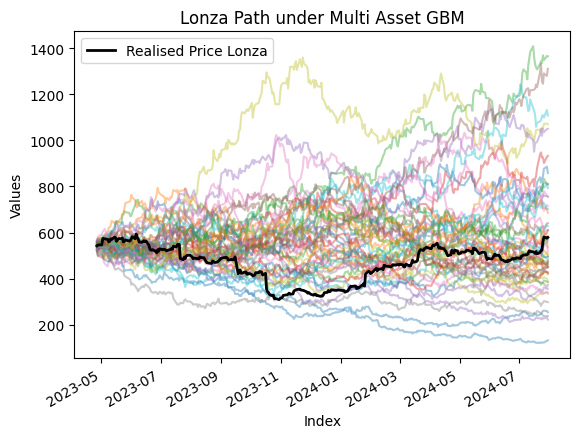

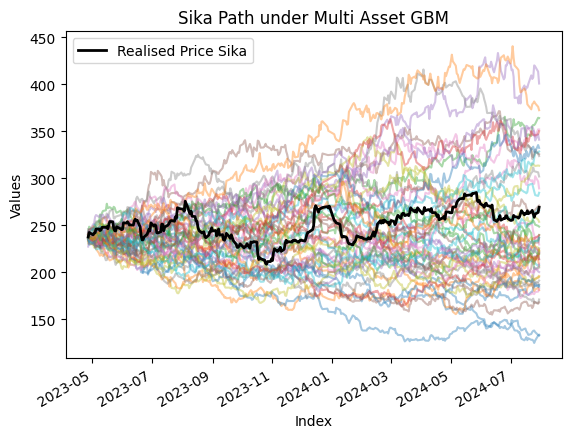

,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,...,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW
2023-04-27,539.598320,236.890472,568.996460,237.132830,528.242440,236.904673,551.317492,238.042350,549.307141,240.626272,...,537.268950,238.260690,567.056237,240.310887,558.952792,236.729405,545.246649,239.340458,537.475306,236.368719
2023-04-28,542.734149,237.748368,555.298810,237.173473,528.650696,245.046996,545.034881,238.605299,543.772854,239.668216,...,527.343505,237.119897,582.280939,241.138571,562.502978,234.804568,549.375288,236.888285,534.350204,240.512939
2023-05-02,543.039014,231.392799,548.909042,236.210651,541.858465,247.273188,541.653968,239.233513,559.631351,239.399491,...,533.695304,237.710407,593.134626,237.656360,568.198266,230.611578,535.244056,234.463845,544.614923,246.521079
2023-05-03,526.139956,231.085172,555.027653,229.589551,547.191120,243.829894,551.701100,238.996961,541.951435,238.708749,...,542.283227,236.422365,605.210638,240.015993,574.967438,234.745613,557.053494,242.412264,538.511977,246.038943
2023-05-04,507.201141,228.544220,558.857464,228.848823,571.116045,246.844328,541.103800,239.398281,552.299268,239.115567,...,531.255011,226.039810,608.804105,240.073291,566.304832,232.458300,538.098239,235.351432,531.219386,245.738189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,121.950014,127.391296,507.195901,190.900649,1336.753273,356.628948,463.780975,211.197532,749.592628,407.283148,...,469.432153,163.816392,331.524799,202.032322,433.946231,183.706985,490.896222,211.489763,719.616319,228.453212
2024-07-25,122.230277,124.913886,511.468344,192.800271,1369.153498,356.501353,476.182405,214.693536,765.932364,419.958312,...,474.737342,168.848422,333.104845,200.060211,444.297852,189.039137,491.283688,209.151401,731.126656,233.504909
2024-07-26,122.168365,127.517028,522.123727,193.505892,1348.756200,357.843249,466.220939,216.072401,758.568143,418.730286,...,466.736768,168.112857,336.734846,202.974754,447.387657,187.951721,500.518874,215.718635,726.939513,233.228130
2024-07-29,129.743866,132.662828,510.329534,193.969571,1366.408112,364.292455,464.216767,217.846930,758.966698,413.376436,...,458.533623,166.573423,343.312991,203.605968,449.599108,188.415420,511.742800,215.939260,701.499713,233.155592


In [3]:
sim_data_combined = gbm.multi_asset_gbm_n_sims(data = data, nsims = cs.n_sims, fdos = cs.initial_fixing_date, plot = False, plotasset=True)
sim_data_combined

In [4]:
lonza_path = sim_data_combined.iloc[:, ::2]
sika_path = sim_data_combined.iloc[:, 1::2]

In [5]:
params_product = {
    'Denomination': 1000,
    'Coupon_Rate': (0.08 / 252) ,  # Quarterly coupon payments
}

In [6]:
payoff_gbm = pf.payoff(lonza_path, sika_path, params_product, cs.initial_fixing_date)
payoff_gbm

array([ 339.27136324,  915.61334489, 1100.        ,  970.1491734 ,
       1100.        , 1100.        , 1042.19385399,  951.12066542,
       1100.        , 1241.67492185,  875.47824899,  853.32881787,
        801.47489422,  919.42992919,  989.12858788,  867.71446001,
       1100.        ,  778.84282552,  707.8429477 , 1100.        ,
        561.79077336,  960.62202691,  953.60018384, 1100.        ,
        503.56923835,  915.88174598, 1055.26987961,  641.44627589,
        861.98410052, 1100.        , 1100.        , 1100.        ,
        962.50203578,  876.51270029, 1100.        , 1083.86335412,
        858.97977566,  531.53451372,  804.60107991,  964.10967369,
        868.12523456,  919.22955912, 1013.79300635,  991.18043794,
        747.12703922,  799.34745711,  716.27500208,  877.45175678,
       1021.18685242, 1084.73811217])

# Control Variate 

In [7]:
## Variance reduction for n sims on one specified FDOS using control variate 

theta_cv = vr.cv(lonza_path=lonza_path, sika_path=sika_path, fdos = cs.initial_fixing_date, K = data.loc[cs.initial_fixing_date][0], payoffs_gbm=payoff_gbm)
print(theta_cv)

Variance Reduction Achieved: nan%
nan


In [8]:
data.loc[cs.initial_fixing_date]

Ticker
LONN.SW    542.120544
SIKA.SW    237.429871
Name: 2023-04-27 00:00:00, dtype: float64

In [9]:
# iterate Variance reduction process for backtesting (last 60 days of product lifetime )
date_list = dates.get_list_dates(cs.initial_fixing_date, cs.final_fixing_date)
date_list = pd.Series(date_list)
date_list = date_list.tail(10).tolist()
cv_payoff_list = []

for fdos in date_list:
    theta_cv_fdos = vr.cv(lonza_path=lonza_path, sika_path=sika_path, fdos = fdos,
                                      K = data.loc[fdos][0], payoffs_gbm=payoff_gbm)
    cv_payoff_list.append(theta_cv_fdos)

    

Variance Reduction Achieved: nan%
Variance Reduction Achieved: nan%
Variance Reduction Achieved: nan%
Variance Reduction Achieved: nan%
Variance Reduction Achieved: nan%
Variance Reduction Achieved: nan%
Variance Reduction Achieved: nan%
Variance Reduction Achieved: nan%
Variance Reduction Achieved: nan%
Variance Reduction Achieved: nan%
